(RM06)=
# RM06

## Linear classification

See also {cite}`Boyd2004` (chapter 8.6).

### Creation of labeled measurements ("training data")

Create $m$ random data pairs $(w_i, l_i)$ of weights and lengths.

In [1]:
m = 300;
w = rand(m,1);  % weight
l = rand(m,1);  % length

Split the measurements into two sets,
such that a data pair $(w_i, l_i)$ is considered as **"good"** for $1 \leq i \leq k \leq m$
and **"bad"** otherwise.

In [2]:
k = m / 3;
w = [w(1:k); w((k+1):m) + 1];
l = [l(1:k); l((k+1):m) + 1];

Plot the resulting data to discriminate.

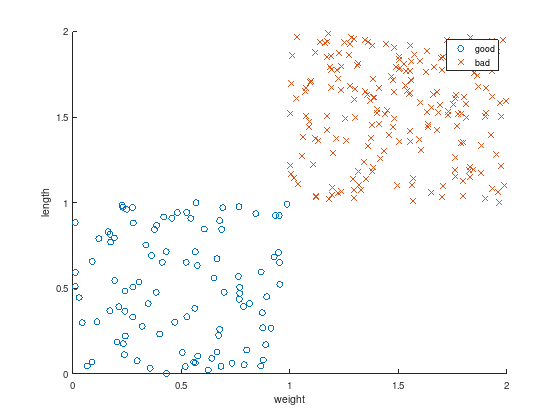

In [3]:
axis equal
scatter(w(1:k),   l(1:k),   'o');  % good
hold on;
scatter(w(k+1:m), l(k+1:m), 'x');  % bad
xlabel('weight');
ylabel('length');
legend ({'good', 'bad'});

### Classification

Looking at the figure above,
it seems possible to find a seperating hyperplane.
That is a linear function with unknown coefficients $x_0$, $x_1$, and $x_2$

$$
f_{\text{linear}}(w_i,l_i)
= x_0 + \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}^{T} \begin{pmatrix} w_i \\ l_i \end{pmatrix}
= x_0 + x_1 \cdot w_i + x_2 \cdot l_i
$$

to seperate
- the **"good"** blue cicles: $f_{\text{linear}}(w_i,l_i) \leq -1$ for $1 \leq i \leq k \leq m$ and
- the **"bad"** red crosses: $f_{\text{linear}}(w_i,l_i) \geq 1$ for $k < i \leq m$.

**Note:** $w_i$ and $l_i$ are the variables of $f_{\text{linear}}(w_i,l_i)$!

### Feasibility problem as Linear Program (LP)

This classification problem can be formulated as LP:

$$
\begin{array}{lrll}
\textrm{minimize}   & \begin{pmatrix} 0 & 0 & 0 \end{pmatrix} & x & \\
\textrm{subject to} &
\begin{pmatrix}
1 & w_i & l_i
\end{pmatrix}
& x \leq -1, & i = 1, \ldots, k, \\
& -\begin{pmatrix}
1 & w_i & l_i
\end{pmatrix}
& x \leq -1, & i = k + 1, \ldots, m,
\end{array}
$$

In [4]:
c = [0 0 0];
A = [ ones(k,  1),  w(1:k),    l(1:k); ...
     -ones(m-k,1), -w(k+1:m), -l(k+1:m) ];
b = -ones(m,1);
Aeq = []; % No equality constraints
beq = [];
lb = -inf(3,1);  % x0 to x2 are free variables
ub =  inf(3,1);
CTYPE = repmat ('U', m, 1);  % Octave: A(i,:)*x <= b(i)
x0 = [];  % default start value
%[x,~,exitflag] = linprog(c,A,b,Aeq,beq,lb,ub,x0);  % Matlab: exitflag=1 success
[x,~,exitflag] = glpk(c,A,b,lb,ub,CTYPE)            % Octave: exitflag=0 success

x =

  -23.712
   10.969
   11.999

exitflag = 0


The computed solution $x$ are the sought coefficients for $f_{\text{linear}}(w_i,l_i)$.
Plotting the resulting function shows that it perfectly discriminates the measurements (test data).

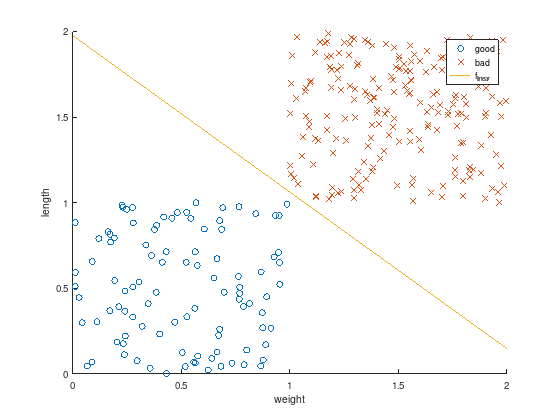

In [5]:
axis equal
scatter(w(1:k),   l(1:k),   'o');  % good
hold on;
scatter(w(k+1:m), l(k+1:m), 'x');  % bad

f_quad = @(w,l) 1.*x(1) + w.*x(2) + l.*x(3);
ezplot (f_quad, [0,2,0,2]);

title ('');
xlabel('weight');
ylabel('length');
legend ({'good', 'bad', 'f_{linear}'});

After this "training" the linear discrimination function $f_{\text{linear}}(w_i,l_i)$
can be used to classify other data pairs as well.